In [80]:
initial_path = 'peptide-QML'
# initial_path = '..'

In [81]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append(initial_path)

%load_ext autoreload
%autoreload 2
from my_code import helper_classes as c

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# sweep_12c_e_v3-1

In [82]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0921',
    file_name='sweep_12c_e_v3-1',
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

In [83]:
sweep.lists['n_parameters']

[188, 552, 188, 552]

No handles with labels found to put in legend.


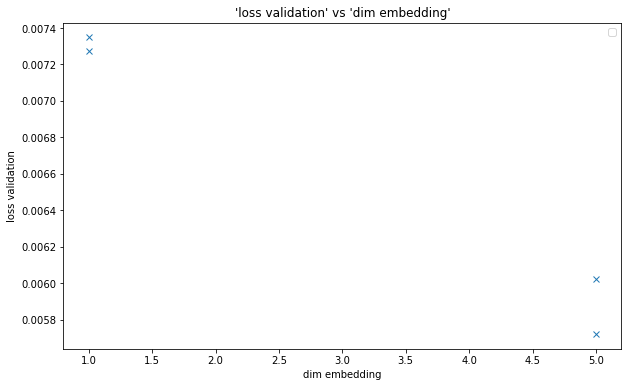

In [84]:
sweep.plot(
    x_key='embedding_dim',
    y_key='loss_validation',
    legend_keys=[],
    fit_degree=None,
    replace=[('embedding_dim', 'dim embedding'), ('loss_validation', 'loss validation')],
)

# sweep_12h_er_Xqm_v2-1

In [85]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0918',
    file_name='sweep_12h_er_Xqm_v2-1',
)

In [86]:
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'embedding_n_repetitions', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

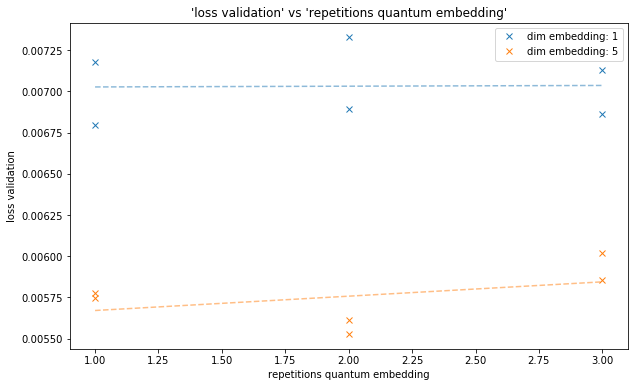

In [87]:
sweep.plot(
    x_key='embedding_n_repetitions',
    y_key='loss_validation',
    legend_keys=['embedding_dim'],
    fit_degree=1,
    replace=[('embedding_n_repetitions', 'repetitions quantum embedding'), ('embedding_dim', 'dim embedding'), ('loss_validation', 'loss validation')],
)

# sweep_12h_er_Xqm-2

In [88]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0918',
    file_name='sweep_12h_er_Xqm-2',
)

In [89]:
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'n_layers_quantum_block', 'embedding_n_layers', 'embedding_dim', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

In [90]:
list(zip(sweep.lists['embedding_dim'], sweep.lists['embedding_n_layers'], sweep.lists['n_layers_quantum_block'], sweep.lists['n_parameters']))

[(1, 0, 2, 248),
 (5, 0, 2, 612),
 (1, 1, 2, 268),
 (5, 1, 2, 632),
 (1, 2, 2, 288),
 (5, 2, 2, 652),
 (1, 3, 2, 308),
 (5, 3, 2, 672),
 (1, 0, 10, 408),
 (5, 0, 10, 772),
 (1, 1, 10, 428),
 (5, 1, 10, 792),
 (1, 2, 10, 448),
 (5, 2, 10, 812),
 (1, 3, 10, 468),
 (5, 3, 10, 832),
 (1, 0, 20, 608),
 (5, 0, 20, 972),
 (1, 1, 20, 628),
 (5, 1, 20, 992),
 (1, 2, 20, 648)]

No handles with labels found to put in legend.


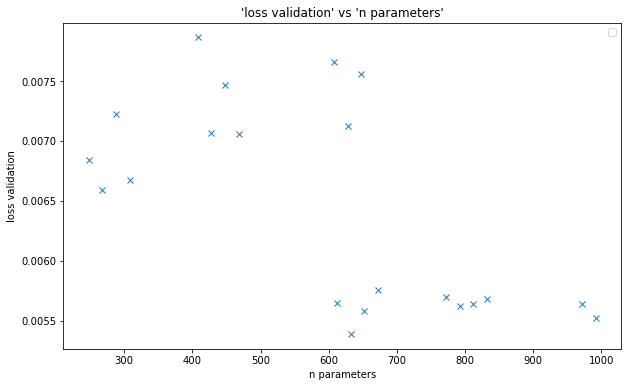

In [91]:
sweep.plot(
    x_key='n_parameters',
    y_key='loss_validation',
    legend_keys=[],
    fit_degree=None,
    replace=[('loss_validation', 'loss validation'), ('n_parameters', 'n parameters')],
)

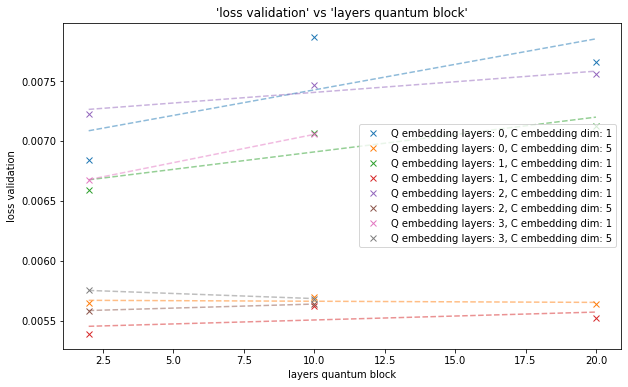

In [92]:
sweep.plot(
    x_key='n_layers_quantum_block',
    y_key='loss_validation',
    legend_keys=['embedding_n_layers', 'embedding_dim'],
    fit_degree=1,
    replace=[('embedding_n_layers', 'Q embedding layers'), ('embedding_dim', 'C embedding dim'), ('loss_validation', 'loss validation'), ('n_layers_quantum_block', 'layers quantum block')],
)

# sweep_12h_er_Xqm_v2-2

In [93]:
sweep = c.Sweep.load(
    initial_path=initial_path,
    day='0919',
    file_name='sweep_12h_er_Xqm_v2-2',
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'embedding_n_repetitions', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train'])

In [94]:
sweep.lists['n_parameters']

[408, 408, 408, 772, 772, 772, 408, 408, 408, 772, 772, 772]

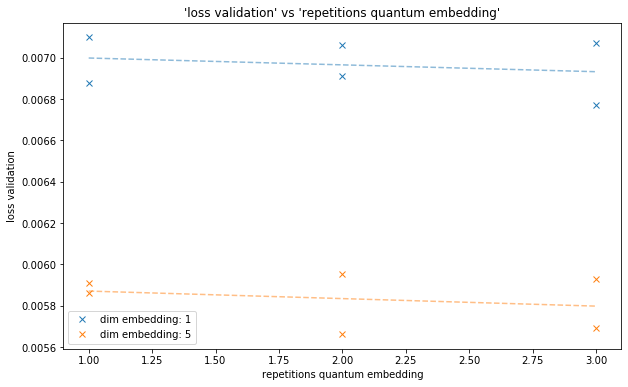

In [95]:
sweep.plot(
    x_key='embedding_n_repetitions',
    y_key='loss_validation',
    legend_keys=['embedding_dim'],
    fit_degree=1,
    replace=[('embedding_n_repetitions', 'repetitions quantum embedding'), ('embedding_dim', 'dim embedding'), ('loss_validation', 'loss validation')],
)

# sweep_12h_er_Xqm_v3

In [96]:
sweep = c.SweepUnion(
    sweeps=[
        c.Sweep.load(
            initial_path=initial_path,
            day='0918',
            file_name='sweep_12h_er_Xqm_v3-1',
        ),
        c.Sweep.load(
            initial_path=initial_path,
            day='0921',
            file_name='sweep_12h_er_Xqm_v3-2',
        ),
    ]
)
sweep.lists.keys()

dict_keys(['idx', 'repetitions', 'embedding_dim', 'model_uuid', 'best_loss_train', 'best_loss_test', 'loss_validation', 'n_parameters', 'time_train', 'sweep_uuid'])

No handles with labels found to put in legend.


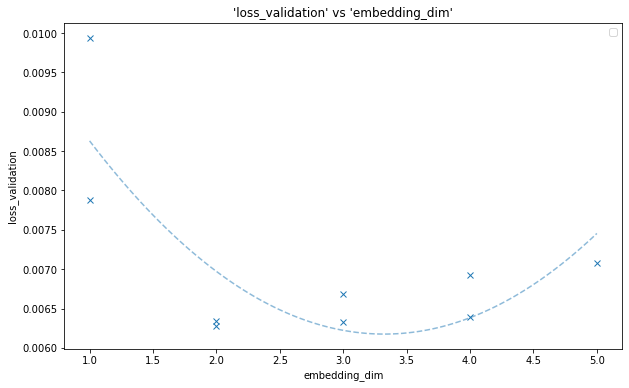

In [97]:
sweep.plot(
    x_key='embedding_dim',
    y_key='loss_validation',
    legend_keys=[],
    fit_degree=2,
    replace=[],
)